# Project: Investigate a Dataset (Database_No_Show_Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. For the purpose of clarity;
> - ScheduledDay - what day the patient set up their appointment. 
> - AppointmentDay - the fixed date of the appointment
> - Neighborhood - the location of the hospital.
> - Scholarship - whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
> - No-show has two distinct observations, 'No' and 'Yes'. No indicates completed appointment, and 'Yes' indicates a missed appointment
> - SMS received - number of messages sent to the patient
> - Other variables are self explanatory. Each observation represented as 0 and 1, indicates False and True values respectively

In [1]:
#import relevant modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns
from functools import reduce
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, dataset will be loaded and checked for cleanliness. 

### General Properties

In [2]:
# Load and inspect data
med_app = pd.read_csv('C:/Users/Administrator/Documents/ALX-T Nano degree/project-investigating-dataset/dataset/no-show-appointments.csv')
med_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# inspect dataframe, and datatypes
med_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check for duplicate entries
med_app.duplicated().sum()

0

In [5]:
# view summary of data set
med_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# check for unique values in Gender, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap
med_app['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [7]:
med_app['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [8]:
med_app['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [9]:
med_app['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [10]:
med_app['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [11]:
med_app['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [12]:
med_app['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [13]:
# check for missing values
med_app.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> Observation 
> - irrelevant variables
> - naming conventions
> - date formats
> - incorrect data types
> - outlier in the age and handicap columns .


### Data Cleaning

In [14]:
# drop irrelevant columns
med_app = med_app.drop(['PatientId', 'Neighbourhood'], axis = 1)

In [15]:
# update column names
med_app = med_app.rename(columns = {'AppointmentID':'appointment_id', 'Gender':'gender', 'ScheduledDay':'scheduled_day', 'AppointmentDay':'appointment_day', 'Age':'age', 'Scholarship':'scholarship', 'Hipertension':'hypertension', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 'SMS_received':'sms_received', 'No-show':'no_show'})
med_app

,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,0,1,No
110523,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,0,1,No
110524,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,0,1,No
110525,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,0,1,No


In [16]:
# change date format from 'YYYY-MM-DDTHH:MM:SSZ' to 'YYYY-MM-DD' and convert to datetime data type

In [17]:
# fix date format
med_app['scheduled_day'] = med_app['scheduled_day'].str.slice(stop=10)

In [18]:
med_app['appointment_day'] = med_app['appointment_day'].str.slice(stop=10)

In [19]:
# update date datatype
med_app['scheduled_day'] = pd.to_datetime(med_app['scheduled_day'])

In [20]:
med_app['appointment_day'] = pd.to_datetime(med_app['appointment_day'])

In [21]:
# confirm data type conversions
med_app.dtypes

appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
dtype: object

In [22]:
# delete rows with outliers
med_app.query('age < 0')

,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,5775010,F,2016-06-06,2016-06-06,-1,0,0,0,0,0,0,No


In [23]:
med_app = med_app.drop([99832])

In [24]:
med_app.query('handicap == [2,3,4]')

,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
946,5582483,M,2016-04-14,2016-04-29,94,0,1,1,0,2,1,No
1665,5525497,M,2016-03-30,2016-04-29,64,0,1,0,1,2,1,No
1666,5525498,M,2016-03-30,2016-04-29,64,0,1,0,1,2,0,No
2071,5640120,M,2016-04-29,2016-04-29,64,0,1,0,1,2,0,No
2091,5638626,F,2016-04-29,2016-04-29,11,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
108376,5756931,F,2016-06-01,2016-06-07,44,0,1,1,0,2,1,No
109484,5752442,M,2016-05-31,2016-06-02,64,0,1,1,0,2,0,No
109733,5772744,F,2016-06-03,2016-06-07,34,0,0,0,0,2,1,No
109975,5766970,M,2016-06-02,2016-06-06,39,1,0,0,0,2,1,No


In [25]:
med_app = med_app.set_index('handicap')
med_app = med_app.drop([2, 3, 4], axis = 0)
med_app

,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show
handicap,,,,,,,,,,,
0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,No
0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No
0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No
0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No
0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...
0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,No
0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,No
0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,No


In [26]:
#assign cleaned data to a variable for further analysis
med_app_cleaned = med_app.reset_index()

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

Explore the timeline between scheduling appointments and appointment day

In [27]:
# explore timeline between scheduling and appointment observations
# create a new column for the timeline and call wait_time
med_app_cleaned['wait_time'] = med_app_cleaned['appointment_day'] - med_app_cleaned['scheduled_day']

In [28]:
# view properties of new column, 'wait_time'
med_app_cleaned.describe()

,handicap,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received,wait_time
count,110327.000000,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327
mean,0.018509,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.321182,10 days 04:29:14.333934576
std,0.134782,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.466932,15 days 06:11:17.038357920
min,0.000000,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,0.000000,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,0.000000,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,0.000000,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,1.000000,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00


In [29]:
# Notice the minimum wait time is negative, this indicates error in the scheduling and appointment date entry. Check for more incorrect entries within these columns by viewing outliers within 'wait_time' column
med_app_cleaned.loc[med_app_cleaned['wait_time'] < pd.Timedelta(0, 'D')]

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
26987,1,5679978,M,2016-05-10,2016-05-09,38,0,0,0,0,0,Yes,-1 days
55133,1,5715660,F,2016-05-18,2016-05-17,19,0,0,0,0,0,Yes,-1 days
64067,0,5664962,F,2016-05-05,2016-05-04,22,0,0,0,0,0,Yes,-1 days
71408,0,5686628,F,2016-05-11,2016-05-05,81,0,0,0,0,0,Yes,-6 days
72235,0,5655637,M,2016-05-04,2016-05-03,7,0,0,0,0,0,Yes,-1 days


In [30]:
# delete outliers
med_app_cleaned.drop([26987, 55133, 64067, 71408, 72235], inplace = True)

In [31]:
# confirm rows are deleted
med_app_cleaned.describe()

,handicap,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received,wait_time
count,110322.000000,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322
mean,0.018491,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.321196,10 days 04:30:02.055800293
std,0.134720,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.466938,15 days 06:11:27.339088303
min,0.000000,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,0.000000,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,0.000000,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,0.000000,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,1.000000,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00


Map numerical data to 'no_show' column, and split. Then perform a join with the split data to a single dataframe, and group by 'wait_time' in a categorical format

In [34]:
# map string to numbers, and convert to int data type
mapping = {'No': 0, 'Yes': 1}
no_show_int = med_app_cleaned.replace({'no_show':mapping})
no_show_int

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0 days
1,0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0 days
2,0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0 days
3,0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0 days
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,0,35 days
110323,0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,0,35 days
110324,0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,0,41 days
110325,0,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,1,0,41 days


In [35]:
# convert wait time to seconds
no_show_int['wait_time'] = no_show_int['wait_time'].dt.total_seconds()

In [36]:
# create categorical data for wait time with values from its summary
# view the summary
no_show_int.describe()

,handicap,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
count,110322.000000,1.103220e+05,110322.00000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,110322.000000,1.103220e+05
mean,0.018491,5.675297e+06,37.07092,0.098285,0.196842,0.071609,0.030384,0.321196,0.201891,8.802021e+05
std,0.134720,7.130031e+04,23.09791,0.297701,0.397614,0.257840,0.171642,0.466938,0.401413,1.318287e+06
min,0.000000,5.030230e+06,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,5.640275e+06,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,5.680568e+06,37.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.456000e+05
75%,0.000000,5.725513e+06,55.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.296000e+06
max,1.000000,5.790484e+06,115.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.546560e+07


In [37]:
# create bins
time_bins = [0.000000e+00, 0.000000e+00, 3.456000e+05, 1.296000e+06, 1.546560e+07]
time_bin_names = ['Same_day', '< 1 month', '> 1 month']

In [38]:
# split dataframe into two, for Successful and Failed appointments
s_app = no_show_int.query('no_show == 0')
f_app = no_show_int.query('no_show == 1')
s_app

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0.0
1,0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0.0
2,0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0.0
3,0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0.0
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,0,3024000.0
110323,0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,0,3024000.0
110324,0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,0,3542400.0
110325,0,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,1,0,3542400.0


In [39]:
# create category for Successful Appointments, in a new column 'time_range'
app_time_range_s = s_app.copy()
app_time_range_s['time_range'] = pd.cut(app_time_range_s['wait_time'], time_bins, labels=time_bin_names, duplicates='drop')

In [40]:
# group data by 'time_range'
successful_time_range = app_time_range_s.groupby('time_range').count()
successful_time_range

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
time_range,,,,,,,,,,,,,
Same_day,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345
< 1 month,18368,18368,18368,18368,18368,18368,18368,18368,18368,18368,18368,18368,18368
> 1 month,17631,17631,17631,17631,17631,17631,17631,17631,17631,17631,17631,17631,17631


Repeat for Failed Appointments

In [41]:
app_time_range_f = f_app.copy()
app_time_range_f['time_range'] = pd.cut(app_time_range_f['wait_time'], time_bins, labels=time_bin_names, duplicates='drop')
failed_time_range = app_time_range_f.groupby('time_range').count()
failed_time_range

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
time_range,,,,,,,,,,,,,
Same_day,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580,4580
< 1 month,7339,7339,7339,7339,7339,7339,7339,7339,7339,7339,7339,7339,7339
> 1 month,8564,8564,8564,8564,8564,8564,8564,8564,8564,8564,8564,8564,8564


In [58]:
# join the two data frames using the 'time_range' column, and indicate a suffix to differentiate variables
df = successful_time_range.join(failed_time_range, lsuffix = '_s', rsuffix= '_f')

In [59]:
# create a dataframe for visualization
time_range_combined = df[['no_show_s', 'no_show_f']]
time_range_combined.columns = ['Successful', 'Failed']
time_range_combined = time_range_combined.reset_index()
time_range_combined

,time_range,Successful,Failed
0,Same_day,15345,4580
1,< 1 month,18368,7339
2,> 1 month,17631,8564


<AxesSubplot:title={'center':'Appointment Availability Time range'}, xlabel='Wait Period', ylabel='Number of Appointments'>

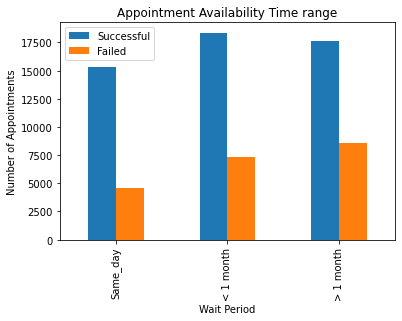

In [60]:
# plot data 
time_range_combined.plot(x = 'time_range', y = ['Successful', 'Failed'], kind = 'bar', xlabel = 'Wait Period', ylabel = 'Number of Appointments', title = 'Appointment Availability Time range')

Observation
> - Longer wait periods correlate to greater failed appointments

Explore appointment pattern for each day of the week

In [61]:
# extract day of week from appointment day, and create new column 'day_of_week'
no_show_int['day_of_week'] = no_show_int['appointment_day'].dt.day_name()

In [62]:
# split dataframe to Successful and Failed appointment
sd_app = no_show_int.query('no_show == 0')
fd_app = no_show_int.query('no_show == 1')

In [63]:
# group data by 'day_of_week'
successful_app = sd_app.groupby('day_of_week').count()
failed_app = fd_app.groupby('day_of_week').count()

In [65]:
# create dataframe for visualization
df1 = successful_app.join(failed_app, lsuffix = '_s', rsuffix = '_f')
app_combined = df1[['no_show_s', 'no_show_f']]
app_combined.columns = ['Successful', 'Failed']
app_combined = app_combined.reset_index()

In [66]:
# arrange the day_of_week in order
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
app_combined['day_of_week'] = pd.Categorical(app_combined['day_of_week'], categories=weekdays, ordered=True)
app_combined = app_combined.sort_values('day_of_week')
app_combined = app_combined.reset_index(drop=True)
app_combined 

,day_of_week,Successful,Failed
0,Monday,17997,4680
1,Tuesday,20448,5134
2,Wednesday,20740,5083
3,Thursday,13882,3334
4,Friday,14952,4033
5,Saturday,30,9


<AxesSubplot:title={'center':'Appointment rate by day'}, xlabel='Weekday', ylabel='Number of appointments'>

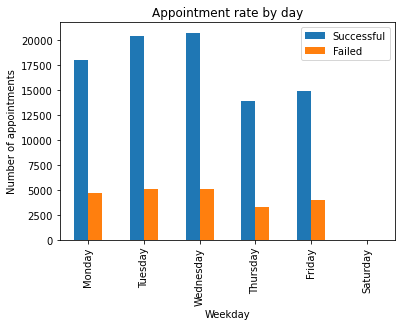

In [67]:
# visualize data
app_combined.plot(x= 'day_of_week', y= ['Successful', 'Failed'], xlabel = 'Weekday', ylabel = 'Number of appointments', title= 'Appointment rate by day', kind='bar')

Observation
> - Extremely Low Appointments on Saturday 

Explore age variable on appointment status

In [68]:
# group age into category
bins = [0, 18, 37, 55, 115]
bin_names = ['Child', 'Young Adult', 'Middle-aged Adult', 'Older Adult']

In [69]:
# create age categories column, 'age_class' for successful and failed appointments
# For Successful appointments
age_app_s = s_app.copy()
age_app_s['age_class'] = pd.cut(age_app_s['age'], bins, labels=bin_names)
age_app_s

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time,age_class
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0.0,Older Adult
1,0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0.0,Older Adult
2,0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0.0,Older Adult
3,0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0.0,Child
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0.0,Older Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,0,3024000.0,Older Adult
110323,0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,0,3024000.0,Middle-aged Adult
110324,0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,0,3542400.0,Young Adult
110325,0,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,1,0,3542400.0,Middle-aged Adult


In [70]:
# For Failed appointments
age_app_f = f_app.copy()
age_app_f['age_class'] = pd.cut(age_app_f['age'], bins, labels=bin_names)
age_app_f

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time,age_class
6,0,5630279,F,2016-04-27,2016-04-29,23,0,0,0,0,0,1,172800.0,Young Adult
7,0,5630575,F,2016-04-27,2016-04-29,39,0,0,0,0,0,1,172800.0,Middle-aged Adult
11,0,5620163,M,2016-04-26,2016-04-29,29,0,0,0,0,1,1,259200.0,Young Adult
17,0,5633460,F,2016-04-28,2016-04-29,40,1,0,0,0,0,1,86400.0,Middle-aged Adult
20,0,5626083,F,2016-04-27,2016-04-29,30,0,0,0,0,0,1,172800.0,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110284,0,5772155,F,2016-06-03,2016-06-07,45,0,0,0,0,0,1,345600.0,Middle-aged Adult
110292,0,5786741,M,2016-06-08,2016-06-08,33,0,1,0,0,0,1,0.0,Young Adult
110296,0,5779046,F,2016-06-06,2016-06-08,37,0,1,0,0,0,1,172800.0,Young Adult
110315,0,5778621,M,2016-06-06,2016-06-08,33,0,1,0,0,0,1,172800.0,Young Adult


In [71]:
# group each dataframe by 'age_class'
age_class_successful = age_app_s.groupby('age_class').count()
age_class_failed = age_app_f.groupby('age_class').count()
age_class_failed

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
age_class,,,,,,,,,,,,,
Child,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700,5700
Young Adult,6406,6406,6406,6406,6406,6406,6406,6406,6406,6406,6406,6406,6406
Middle-aged Adult,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246,5246
Older Adult,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282,4282


In [72]:
# merge Successful and Failed dataframe using .join()

In [79]:
df2 = age_class_successful.join(age_class_failed, lsuffix = '_s', rsuffix = '_f')

In [80]:
# create dataframe for visualization
age_class_combined = df2[['no_show_s', 'no_show_f']]
age_class_combined.columns = ['Successful', 'Failed']
age_class_combined = age_class_combined.reset_index()
age_class_combined

,age_class,Successful,Failed
0,Child,19579,5700
1,Young Adult,20804,6406
2,Middle-aged Adult,21623,5246
3,Older Adult,23143,4282


<AxesSubplot:title={'center':'Appointment rate by age'}, xlabel='Age Class', ylabel='Number of appointments'>

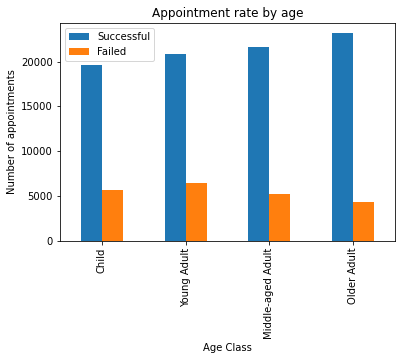

In [81]:
# plot visualization
age_class_combined.plot(x= 'age_class', y= ['Successful', 'Failed'],xlabel = 'Age Class', ylabel = 'Number of appointments', title= 'Appointment rate by age', kind='bar')

Observation
> - Older Adult have more Successful Appointments
> - Older Adult have the least Failed Appointments
> - Young Adult have the most Failed Appointments

In [82]:
# group dataframe by 'no_show'
health_cnd = med_app_cleaned.groupby('no_show').sum()
health_cnd

,handicap,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received
no_show,,,,,,,,
No,1676,500217295549,3326235,8266,17968,6478,2677,25660
Yes,364,125892864729,763503,2577,3748,1422,675,9775


In [83]:
# rename index 
health_cnd = health_cnd.rename(index = {'No':'Successful', 'Yes':'Failed'})

Text(0.5, 1.0, 'Appointment Rate by Health Condition')

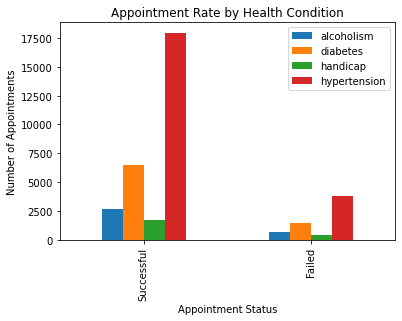

In [78]:
# plot visualization
health_cnd.plot(y = ['alcoholism', 'diabetes', 'handicap', 'hypertension'], kind = 'bar')
plt.ylabel('Number of Appointments')
plt.xlabel('Appointment Status')
plt.title('Appointment Rate by Health Condition')

Observation
> - Hypertension has the highest successful appointment, this is also the trend with Failed appointments. Both share similarities in the direction of their variables, the sample size can be attributed to their distribution difference. Hence, there is no relation between health condition and appointment status

Explore sms_received variable

In [84]:
# group dataframe by sms_received
df3 = s_app.groupby('sms_received').count()
df4 = f_app.groupby('sms_received').count()

In [85]:
# create data viz
sms_data = df3.join(df4, lsuffix = '_s', rsuffix = '_f')
sms_combined = sms_data[['no_show_s', 'no_show_f']]
sms_combined.columns = ['Successful', 'Failed']
sms_combined = sms_combined.reset_index()
sms_combined

,sms_received,Successful,Failed
0,0,62389,12498
1,1,25660,9775


In [86]:
#map True and False to sms_received values
mapping_3 = {0:'False', 1:'True'}
sms_combined = sms_combined.replace({'sms_received':mapping_3})

<AxesSubplot:title={'center':'Appointment Rate by SMS Received'}, xlabel='SMS Received', ylabel='Number of Appointments'>

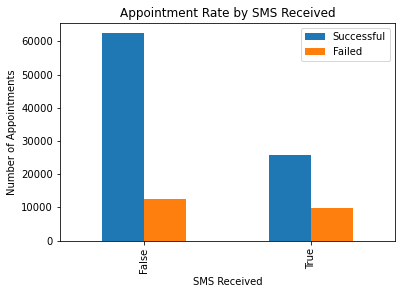

In [87]:
# create plot
sms_combined.plot(x = 'sms_received', y = ['Successful', 'Failed'], xlabel = 'SMS Received', ylabel = 'Number of Appointments', title = 'Appointment Rate by SMS Received', kind= 'bar')

Observation
> - SMS Received has negative correlation with Appointment status 

Explore Appointment Status by gender

In [88]:
# create new variables
df5_s = s_app.copy()
df5_f = f_app.copy()

In [89]:
# group data by gender
gender_s = df5_s.groupby('gender').count()
gender_f = df5_f.groupby('gender').count()

In [90]:
#create alias for columns
gender_s = gender_s.rename(lambda x: x[:11] + '_s', axis='columns')

In [91]:
# join dataframe to single dataframe
gender_combined = gender_s.merge(gender_f, how='outer', on = 'gender')
gender_combined

,handicap_s,appointment_s,scheduled_d_s,appointment_s,age_s,scholarship_s,hypertensio_s,diabetes_s,alcoholism_s,sms_receive_s,...,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
gender,,,,,,,,,,,,,,,,,,,,,
F,57162,57162,57162,57162,57162,57162,57162,57162,57162,57162,...,14565,14565,14565,14565,14565,14565,14565,14565,14565,14565
M,30887,30887,30887,30887,30887,30887,30887,30887,30887,30887,...,7708,7708,7708,7708,7708,7708,7708,7708,7708,7708


<AxesSubplot:title={'center':'Appointment Status by Gender'}, xlabel='Gender', ylabel='Number of Appointments'>

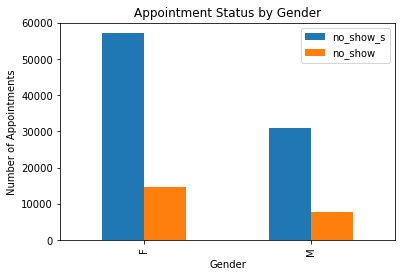

In [92]:
# plot visualization
gender_combined.plot(y=['no_show_s', 'no_show'], xlabel = 'Gender', ylabel = 'Number of Appointments', title = 'Appointment Status by Gender', kind='bar')

Observation
> - Women have high successful appointments

### Research Question 2  (Is a certain type of health condition associated with gender?)

In [93]:
#view dataframe
med_app_cleaned

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,No,0 days
1,0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No,0 days
2,0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No,0 days
3,0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No,0 days
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,No,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,No,35 days
110323,0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,No,35 days
110324,0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,No,41 days
110325,0,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,1,No,41 days


In [94]:
#split data for hypertension
hypertension_t = med_app_cleaned.query('hypertension == 1')
hypertension_f = med_app_cleaned.query('hypertension == 0')

In [95]:
#group data by gender
hypertension = hypertension_t.groupby('gender').count()

In [96]:
#assign suffix to column names
hypertension = hypertension.rename(lambda x: x[:11] + '_h', axis='columns')

In [97]:
#repeat each step for diabetes, alcoholism, and handicap

In [98]:
#split data for diabetes
diabetes_t = med_app_cleaned.query('diabetes == 1')
diabetes = diabetes_t.groupby('gender').count()
diabetes = diabetes.rename(lambda x: x[:11] + '_d', axis='columns')

In [99]:
#split for alchoholism
alcoholism_t = med_app_cleaned.query('alcoholism == 1')
alcoholism = alcoholism_t.groupby('gender').count()
alcoholism = alcoholism.rename(lambda x: x[:11] + '_a', axis='columns')

In [100]:
#split for handicap
handicap_t = med_app_cleaned.query('handicap == 1')
handicap = handicap_t.groupby('gender').count()
handicap = handicap.rename(lambda x: x[:11] + '_ha', axis='columns')

In [101]:
#merge dataframes
df6 = [alcoholism, diabetes, handicap, hypertension]
Health_condition = reduce(lambda left,right: pd.merge(left,right, on = 'gender', how = 'outer'), df6)
Health_condition

,handicap_a,appointment_a,scheduled_d_a,appointment_a,age_a,scholarship_a,hypertensio_a,diabetes_a,alcoholism_a,sms_receive_a,...,scheduled_d_h,appointment_h,age_h,scholarship_h,hypertensio_h,diabetes_h,alcoholism_h,sms_receive_h,no_show_h,wait_time_h
gender,,,,,,,,,,,,,,,,,,,,,
F,1223,1223,1223,1223,1223,1223,1223,1223,1223,1223,...,15290,15290,15290,15290,15290,15290,15290,15290,15290,15290
M,2129,2129,2129,2129,2129,2129,2129,2129,2129,2129,...,6426,6426,6426,6426,6426,6426,6426,6426,6426,6426


<AxesSubplot:title={'center':'Diagnosis by Gender'}, xlabel='Gender', ylabel='Number of Patients'>

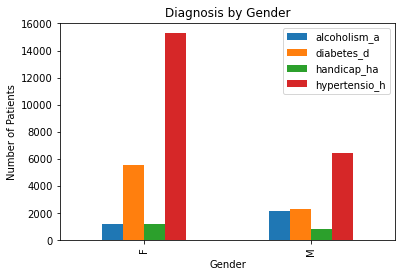

In [102]:
#plot visualization
Health_condition.plot(y=['alcoholism_a', 'diabetes_d', 'handicap_ha', 'hypertensio_h'], xlabel = 'Gender', ylabel = 'Number of Patients', title = 'Diagnosis by Gender', kind='bar')

Observation
> - More female patients are diagnosed with Hypertension and Diabetes than male
> - More male patients are diagnosed with Alcoholism than female

### Research Question 3  (What kind of health condition is common with each age group?)

In [103]:
# view summary of age column
med_app_cleaned['age'].describe()

count    110322.00000
mean         37.07092
std          23.09791
min           0.00000
25%          18.00000
50%          37.00000
75%          55.00000
max         115.00000
Name: age, dtype: float64

In [104]:
# create bins
bins = [0.0, 18.0, 37.0, 55.0, 115.0]
bin_names = ['Child', 'Young Adult', 'Middle-aged Adult', 'Older Adult']

In [105]:
# categorize dataframe with bins
age_health = med_app_cleaned.copy()
age_health['age_class'] = pd.cut(age_health['age'], bins, labels=bin_names)
age_health

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time,age_class
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,No,0 days,Older Adult
1,0,5642503,M,2016-04-29,2016-04-29,56,0,0,0,0,0,No,0 days,Older Adult
2,0,5642549,F,2016-04-29,2016-04-29,62,0,0,0,0,0,No,0 days,Older Adult
3,0,5642828,F,2016-04-29,2016-04-29,8,0,0,0,0,0,No,0 days,Child
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,No,0 days,Older Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,0,5651768,F,2016-05-03,2016-06-07,56,0,0,0,0,1,No,35 days,Older Adult
110323,0,5650093,F,2016-05-03,2016-06-07,51,0,0,0,0,1,No,35 days,Middle-aged Adult
110324,0,5630692,F,2016-04-27,2016-06-07,21,0,0,0,0,1,No,41 days,Young Adult
110325,0,5630323,F,2016-04-27,2016-06-07,38,0,0,0,0,1,No,41 days,Middle-aged Adult


In [106]:
# for hypertension
hypertension_age = age_health.query('hypertension == 1')
hypertension_age

,handicap,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,wait_time,age_class
0,0,5642903,F,2016-04-29,2016-04-29,62,0,1,0,0,0,No,0 days,Older Adult
4,0,5642494,F,2016-04-29,2016-04-29,56,0,1,1,0,0,No,0 days,Older Adult
5,0,5626772,F,2016-04-27,2016-04-29,76,0,1,0,0,0,No,2 days,Older Adult
25,0,5624020,M,2016-04-26,2016-04-29,46,0,1,0,0,1,No,3 days,Middle-aged Adult
26,0,5641781,F,2016-04-29,2016-04-29,45,0,1,0,0,0,No,0 days,Middle-aged Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110283,0,5769404,F,2016-06-03,2016-06-03,60,0,1,0,0,0,No,0 days,Older Adult
110292,0,5786741,M,2016-06-08,2016-06-08,33,0,1,0,0,0,Yes,0 days,Young Adult
110296,0,5779046,F,2016-06-06,2016-06-08,37,0,1,0,0,0,Yes,2 days,Young Adult
110299,0,5757697,F,2016-06-01,2016-06-01,66,0,1,1,0,0,No,0 days,Older Adult


In [107]:
#group by age_class
hypertension_age_t = hypertension_age.groupby('age_class').count()

In [108]:
#assign suffix to hypertension
hypertension_age_t = hypertension_age_t.rename(lambda x: x[:11] + '_h', axis='columns')

In [109]:
#repeat for diabetes, handicap, alcoholism

In [110]:
#for diabetes
diabetes_age = age_health.query('diabetes == 1')
diabetes_age_t = diabetes_age.groupby('age_class').count()
diabetes_age_t = diabetes_age_t.rename(lambda x: x[:11] + '_d', axis='columns')
diabetes_age_t

,handicap_d,appointment_d,gender_d,scheduled_d_d,appointment_d,age_d,scholarship_d,hypertensio_d,diabetes_d,alcoholism_d,sms_receive_d,no_show_d,wait_time_d
age_class,,,,,,,,,,,,,
Child,51,51,51,51,51,51,51,51,51,51,51,51,51
Young Adult,331,331,331,331,331,331,331,331,331,331,331,331,331
Middle-aged Adult,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004
Older Adult,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514,5514


In [111]:
#for alcoholism
alcoholism_age = age_health.query('alcoholism == 1')
alcoholism_age_t = alcoholism_age.groupby('age_class').count()
alcoholism_age_t = alcoholism_age_t.rename(lambda x: x[:11] + '_a', axis='columns')

In [112]:
#for handicap
handicap_age = age_health.query('handicap == 1')
handicap_age_t = handicap_age.groupby('age_class').count()
handicap_age_t = handicap_age_t.rename(lambda x: x[:11] + '_ha', axis='columns')

In [113]:
#merge dataframe
df10 = [alcoholism_age_t, diabetes_age_t, handicap_age_t, hypertension_age_t]
health_age_condition = reduce(lambda left,right: pd.merge(left,right, on = 'age_class', how = 'outer'), df10)
health_age_condition

,handicap_a,appointment_a,gender_a,scheduled_d_a,appointment_a,age_a,scholarship_a,hypertensio_a,diabetes_a,alcoholism_a,...,scheduled_d_h,appointment_h,age_h,scholarship_h,hypertensio_h,diabetes_h,alcoholism_h,sms_receive_h,no_show_h,wait_time_h
age_class,,,,,,,,,,,,,,,,,,,,,
Child,28,28,28,28,28,28,28,28,28,28,...,40,40,40,40,40,40,40,40,40,40
Young Adult,556,556,556,556,556,556,556,556,556,556,...,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
Middle-aged Adult,1675,1675,1675,1675,1675,1675,1675,1675,1675,1675,...,6414,6414,6414,6414,6414,6414,6414,6414,6414,6414
Older Adult,1093,1093,1093,1093,1093,1093,1093,1093,1093,1093,...,14087,14087,14087,14087,14087,14087,14087,14087,14087,14087


<AxesSubplot:title={'center':'Diagnosis by Age'}, xlabel='Age Classification', ylabel='Number of Patients'>

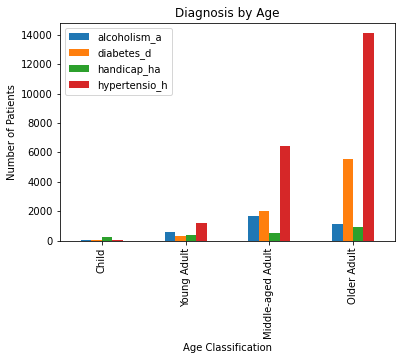

In [114]:
#plot visualization
health_age_condition.plot(y=['alcoholism_a', 'diabetes_d', 'handicap_ha', 'hypertensio_h'], xlabel = 'Age Classification', ylabel = 'Number of Patients', title = 'Diagnosis by Age', kind='bar')

Observation
> - Hypertension is common within the three adult groups, and relatively high in Older adults
> - Children are mostly diagnosed with disabilities i.e. handicap
> - Middle aged adult have the high alcoholism diagnosis

### Research Question 4  (What kinds of properties are associated with patients with scholarships?)

In [52]:
# select patient data with scholarship
scholarship_data = med_edited.query('scholarship == 1')

In [53]:
scholarship_data.describe()

,handicap,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.0,10843.000000,10843.000000,10843.000000,10843.000000
mean,0.014756,1.454281e+14,5.680211e+06,30.625749,1.0,0.173660,0.052384,0.048695,0.322881
std,0.120581,2.552919e+14,6.435087e+04,17.412477,0.0,0.378835,0.222810,0.215240,0.467599
min,0.000000,3.429549e+08,5.134197e+06,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.170784e+12,5.642644e+06,16.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.181724e+13,5.681913e+06,31.000000,1.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,9.437323e+13,5.728580e+06,43.000000,1.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,9.999465e+14,5.790416e+06,84.000000,1.0,1.000000,1.000000,1.000000,1.000000


<a id='conclusions'></a>
## Conclusions
> Key Takeaways
> - There was an increase in successful appointments, during shorter wait periods. Older Adults have more succesful appointments, than the other age classes while Young Adults have the most failed appointment, and Female have more successful appointments than male. Based on these observations, factors to consider with an aim of successful appointment include, the age of the patient, gender of the patient, and appointment wait periods.
> - More females are diagnosed with hypertension and diabetes, while alcholism is common within the Male Patients
> - Hypertension is relatively high in Older Adults
> - Disability (handicap) is common with Children

> - Limitations
> - Unavailable timestamp on appointment day, limits analysis for appointment pattern by hour of the day 
> - Patient Location data limits analysis of distance to Hospital Neighbourhood
